In [1]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%time df = pd.read_csv(r"D:\Nhan\Data\XTX_data.csv")

print(df.shape)
df.tail(10)

Wall time: 16.3 s
(2999999, 61)


,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
2999989,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999990,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999991,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999992,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999993,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999994,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999995,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999996,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999997,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999998,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,...,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5


In [2]:
df = df = df.fillna(0)
df.head()

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


In [3]:
## Generating function on lookback and delay; yielding timeseries samples and their targets
def generator(data, 
              lookback, ## Observations will go back some days, e.g 5 days = 720 lookback.
              delay,   ## Targets will be 24 hours in the future
              min_index, 
              max_index, 
              shuffle = False, 
              batch_size = 128, ## The number of samples per batch; default = 128
              step = 6  ## Observations will be sampled at one data point per hour (10 mins/ timestep).
             ):
    
    X = data.iloc[:, :-1]
    y = data.y.cumsum()
    
    ## normalize data
    X = X.to_numpy()
    mean = X.mean(axis=0)
    X -= mean
    std = X.std(axis=0)
    X /= std
    
    ## normalize target
    y -= y.mean()
    y /= y.std()
    
    # generate sample & target
    if max_index is None:
        max_index = len(X) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros(( len(rows), lookback // step, X.shape[-1] ))
        targets = np.zeros((len(rows), ))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = X[indices]
            targets[j] = y[rows[j] + delay]
        return samples, targets

In [4]:
train_rate = 0.7
nb_train = int(len(df)*train_rate)
nb_vld = int(len(df) * 0.15)

lookback, step, delay, batch_size = 100, 2, 1, 128

train_gen = generator(df,
                        lookback=lookback,
                        delay=delay,
                        min_index=0,
                        max_index = nb_train,
                        step=step,
                        batch_size=batch_size)
## Validation generator
val_gen = generator(df,
                        lookback=lookback,
                        delay = delay,
                        min_index = nb_train + 1,
                        max_index = nb_train + nb_vld,
                        step=step,
                        batch_size=batch_size)
test_gen = generator(df,
                        lookback=lookback,
                        delay=delay,
                        min_index = nb_train + nb_vld + 1,
                        max_index=None,
                        step=step,
                        batch_size=batch_size)

X_train, y_train = train_gen
X_test, y_test = test_gen
X_val, y_val = val_gen

X_train.shape, X_test.shape, X_val.shape, y_train.shape

((128, 50, 60), (128, 50, 60), (128, 50, 60), (128,))

### Without LSTM

## Using LSTM model

In [5]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

m1 = Sequential()
m1.add(Embedding(64, X_train.shape[-1]))
m1.add(LSTM(64, dropout = 0.1, recurrent_dropout = 0.1))
m1.add(Dense(32, activation = 'relu'))
m1.add(Dense(1))
m1.compile(optimizer = 'rmsprop', 
              loss = 'mae')
m1.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 60)          3840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                32000     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 37,953
Trainable params: 37,953
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = m1.fit(X_train.reshape(128, -1), y_train,
                    shuffle = False,
                    steps_per_epoch = 25,
                    epochs = 10,
                    validation_data = (X_val.reshape(128, -1), y_val),
                    validation_steps = 15)

C:\Users\Admin\.conda\envs\projecy\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 128 samples, validate on 128 samples
Epoch 1/10
25/25 [==============================] - 68s 3s/step - loss: 0.3401 - val_loss: 0.1159
Epoch 2/10
25/25 [==============================] - 67s 3s/step - loss: 0.0988 - val_loss: 0.1265
Epoch 3/10
25/25 [==============================] - 67s 3s/step - loss: 0.0726 - val_loss: 0.1165
Epoch 4/10
25/25 [==============================] - 66s 3s/step - loss: 0.0636 - val_loss: 0.1238
Epoch 5/10
25/25 [==============================] - 65s 3s/step - loss: 0.0559 - val_loss: 0.1171
Epoch 6/10
25/25 [==============================] - 66s 3s/step - loss: 0.0506 - val_loss: 0.1229
Epoch 7/10
25/25 [==============================] - 67s 3s/step - loss: 0.0470 - val_loss: 0.1174
Epoch 8/10
25/25 [==============================] - 66s 3s/step - loss: 0.0435 - val_loss: 0.1227
Epoch 9/10
25/25 [==============================] - 66s 3s/step - loss: 0.0405 - val_loss: 0.1174
Epoch 10/10
25/25 [==============================] - 66s 3s/step - loss:

With only `25 step/epochs` at training and only `15 steps at validation`, but the `LSTM` takes about `3-5 seconds / step`, so it it might be not a `good method` to train a model!

In the next section, we will try `GRU 's model`

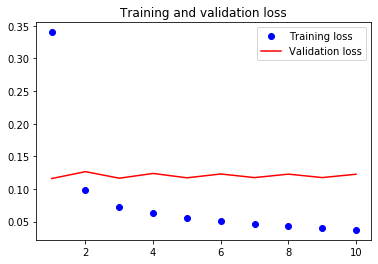

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From `epoch 2`, the `validation loss` is higher than the `training loss` which implies that this model still `significantly overfitting`!

In [8]:
from sklearn.metrics import mean_absolute_error as MAE
from statsmodels.tsa.stattools import acf

pred = m1.predict(X_test.reshape(128, -1))

mae = MAE(pred, y_test)
loss = 1 - acf(pred.ravel() - y_test.ravel(), fft = False)[1]

print('MAE = %s,\nloss = 1 - acf1 = %s '%(mae, loss))

MAE = 2.113287680173629,
loss = 1 - acf1 = 0.03227483018876942 


##  Training and evaluating a GRU-based model

In [9]:
from tensorflow.keras import backend as K
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

X_train.shape, X_test.shape, X_val.shape, y_train.shape

((128, 50, 60), (128, 50, 60), (128, 50, 60), (128,))

In [10]:
# How many steps to draw from val_gen in order to see the entire validation se
val_steps = (nb_vld - 1 - lookback) ## i.e.: (nb_vld + nb_train) - (nb_train + 1) - lookback

# How many steps to draw from test_gen in order to see the entire test set 
test_steps = (len(df) - (nb_train + nb_vld + 1) - lookback)
val_steps, test_steps

(449898, 449900)

In [11]:
model_2 = Sequential()
model_2.add(layers.GRU(32, input_shape = (None, X_train.shape[-1])))
model_2.add(layers.Dense(1))
model_2.compile(optimizer = RMSprop(), 
              loss = 'mae')
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                8928      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model_2.fit(X_train, y_train,
                        shuffle = False,
                        steps_per_epoch = 200,
                        epochs = 20,
                        validation_data = (X_val, y_val),
                        validation_steps = val_steps)

Train on 128 samples, validate on 128 samples
Epoch 1/20
200/200 [==============================] - 170s 849ms/step - loss: 0.1001 - val_loss: 1.4775e-05
Epoch 2/20
200/200 [==============================] - 167s 835ms/step - loss: 0.0641 - val_loss: 1.7810e-05
Epoch 3/20
200/200 [==============================] - 161s 807ms/step - loss: 0.0497 - val_loss: 2.0118e-05
Epoch 4/20
200/200 [==============================] - 161s 804ms/step - loss: 0.0397 - val_loss: 2.2129e-05
Epoch 5/20
200/200 [==============================] - 160s 799ms/step - loss: 0.0329 - val_loss: 2.2525e-05
Epoch 6/20
200/200 [==============================] - 162s 810ms/step - loss: 0.0286 - val_loss: 2.1253e-05
Epoch 7/20
200/200 [==============================] - 163s 815ms/step - loss: 0.0255 - val_loss: 2.5116e-05
Epoch 8/20
200/200 [==============================] - 166s 830ms/step - loss: 0.0232 - val_loss: 2.6367e-05
Epoch 9/20
200/200 [==============================] - 162s 809ms/step - loss: 0.0214 - val

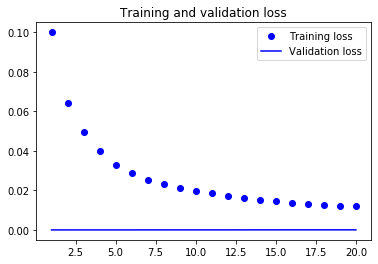

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
import time 
start_time = time.time()

In [15]:
model_2.save('XTX_group.h5')

#### predict

In [18]:
from keras.models import load_model

model = load_model('XTX_group.h5')

pred = model.predict(X_test)

mae = MAE(pred, y_test)
loss = 1 - acf(pred.ravel() - y_test.ravel(), fft = False)[1]

print('MAE = %s,\nloss = 1 - acf1 = %s '%(mae, loss))

MAE = 0.43217184641737383,
loss = 1 - acf1 = 0.027652334841614556 


### Drop-out combine with GRU